In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

In [3]:
def load_data():  
    return pd.read_csv('../data/raw/train.csv')  

order_data = load_data()

In [4]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8138 entries, 0 to 8137
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8138 non-null   int64  
 1   Order ID       8138 non-null   object 
 2   Order Date     8138 non-null   object 
 3   Ship Date      8138 non-null   object 
 4   Ship Mode      8138 non-null   object 
 5   Customer ID    8138 non-null   object 
 6   Customer Name  8138 non-null   object 
 7   Segment        8138 non-null   object 
 8   Country        8138 non-null   object 
 9   City           8138 non-null   object 
 10  State          8138 non-null   object 
 11  Postal Code    8128 non-null   float64
 12  Region         8138 non-null   object 
 13  Product ID     8138 non-null   object 
 14  Category       8138 non-null   object 
 15  Sub-Category   8138 non-null   object 
 16  Product Name   8138 non-null   object 
 17  Sales          8138 non-null   float64
dtypes: float

In [5]:
order_data.rename(columns={'Row ID':'rowId', 'Order ID':'orderId', 'Order Date':'orderDate', 'Ship Date':'shipDate', 'Ship Mode':'shipMode', 'Customer ID':'customerId', 'Customer Name':'customerName', 'Segment':'segment', 'Country':'country', 'City':'city', 'State':'state', 'Postal Code':'postalCode', 'Region':'region', 'Product ID':'productId', 'Category':'category', 'Sub-Category':'subcategory', 'Product Name':'productName', 'Sales':'sales'}, inplace=True)
order_data.head(3)

,rowId,orderId,orderDate,shipDate,shipMode,customerId,customerName,segment,country,city,state,postalCode,region,productId,category,subcategory,productName,sales
0,7981,CA-2015-103800,1/3/2015,1/7/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,740,CA-2015-112326,1/4/2015,1/8/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2,741,CA-2015-112326,1/4/2015,1/8/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736


In [6]:
def monthly_orders(data):
    monthly_data = data.copy()
    monthly_data.orderDate = monthly_data.orderDate.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('orderDate')['sales'].sum().reset_index()
    monthly_data.orderDate = pd.to_datetime(monthly_data.orderDate)
    return monthly_data

In [7]:
monthly_df = monthly_orders(order_data)
monthly_df.head()

,orderDate,sales
0,2002-01-01,1481.828
1,2002-01-10,1247.684
2,2002-01-11,159.384
3,2002-01-12,1596.016
4,2002-01-13,8795.403


### Exploring the Data

In [8]:
# Duration of dataset
def orders_duration(data):
    data.orderDate = pd.to_datetime(data.orderDate)
    number_of_days = data.orderDate.max() - data.orderDate.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(number_of_years, 'years')
    
orders_duration(order_data)

1336 days
3.66027397260274 years


In [9]:
order_data['sales'] = order_data['sales'].astype(np.int64)

In [13]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8138 entries, 0 to 8137
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rowId         8138 non-null   int64         
 1   orderId       8138 non-null   object        
 2   orderDate     8138 non-null   datetime64[ns]
 3   shipDate      8138 non-null   object        
 4   shipMode      8138 non-null   object        
 5   customerId    8138 non-null   object        
 6   customerName  8138 non-null   object        
 7   segment       8138 non-null   object        
 8   country       8138 non-null   object        
 9   city          8138 non-null   object        
 10  state         8138 non-null   object        
 11  postalCode    8128 non-null   float64       
 12  region        8138 non-null   object        
 13  productId     8138 non-null   object        
 14  category      8138 non-null   object        
 15  subcategory   8138 non-null   object  

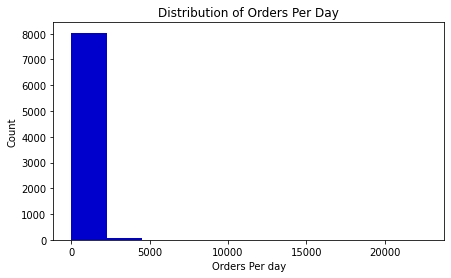

In [22]:
def orders_per_day():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(order_data.sales, color='mediumblue')
    
    ax.set(xlabel = "Orders Per day",
           ylabel = "Count",
           title = "Distribution of Orders Per Day")
    #plt.xlim(0, 5000)
    #plt.ylim(0, 8000)
    
orders_per_day()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


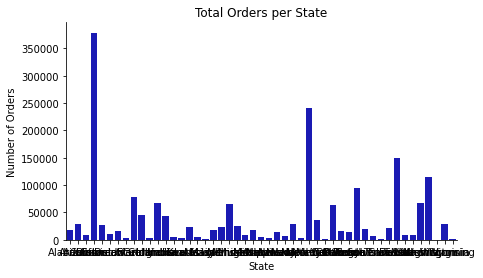

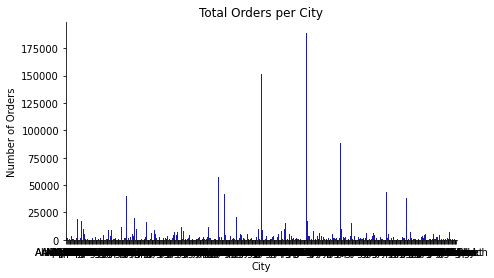

In [37]:
class ordersBy():
    def orders_per_state():
        by_state = order_data.groupby('state')['sales'].sum().reset_index()
        
        fig, ax = plt.subplots(figsize=(7,4))
        sns.barplot(by_state.state, by_state.sales, color='mediumblue')
        
        ax.set(xlabel = "State", ylabel = "Number of Orders", title = "Total Orders per State")
        sns.despine()
        
    def orders_per_city():
        by_city = order_data.groupby('city')['sales'].sum().reset_index()
        
        fig, ax = plt.subplots(figsize=(7,4))
        sns.barplot(by_city.city, by_city.sales, color='mediumblue')
        
        ax.set(xlabel = "City", ylabel = "Number of Orders", title = "Total Orders per City")
        sns.despine()

    orders_per_state()
    orders_per_city()

In [38]:
# Average Monthly Orders
avg_monthly_orders = monthly_df.sales.mean()
print(f"Overall average monthly orders by sales: ${avg_monthly_orders}")

#Last 12 months (this will be the forecasted orders)
avg_monthly_orders_12month = monthly_df.sales[-12:].mean()
print(f"Last 12 months average monthly orders by sales: ${avg_monthly_orders_12month}")

Overall average monthly orders by sales: $5197.170464931506
Last 12 months average monthly orders by sales: $5888.134325


Sample

In [128]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Orders')
    
    second = data.groupby(data.orderDate.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.orderDate, format='%Y')
    # sns.lineplot((second.date + datetime.timedelta(6*365/12)), y_col, data=second, ax=ax, color='red', label='Mean Sales')
    
    ax.set(xlabel = "Date", ylabel = "Orders", title = title)
    
    sns.despine()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/_v/j0sy3fr917v4dly7gy82js9w0000gn/T/ipykernel_39825/770201431.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  second.date = pd.to_datetime(second.orderDate, format='%Y')


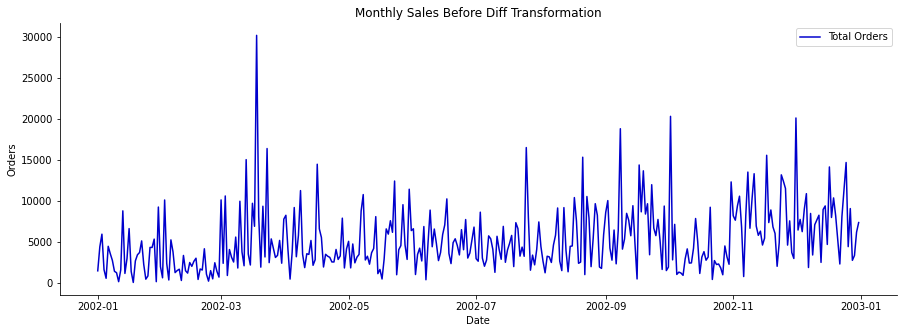

In [129]:
time_plot(monthly_df, 'orderDate', 'sales', 'Monthly Sales Before Diff Transformation')

In [153]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('../data/input/stationary.csv')
    return data

In [154]:
stationary = get_diff(monthly_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/_v/j0sy3fr917v4dly7gy82js9w0000gn/T/ipykernel_39825/770201431.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  second.date = pd.to_datetime(second.orderDate, format='%Y')


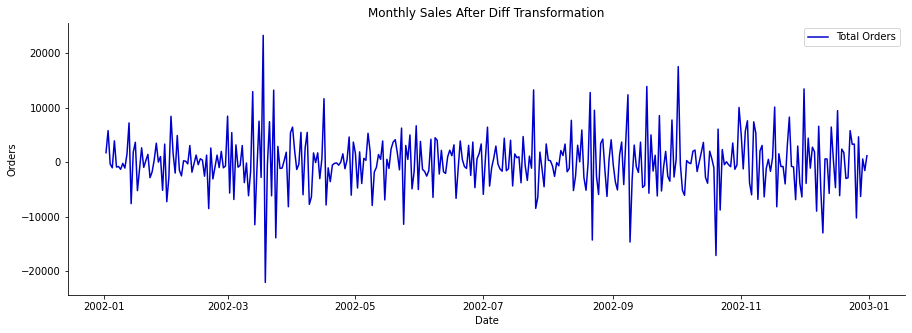

In [155]:
time_plot(stationary, 'orderDate', 'sales_diff', 'Monthly Sales After Diff Transformation')

Sample

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


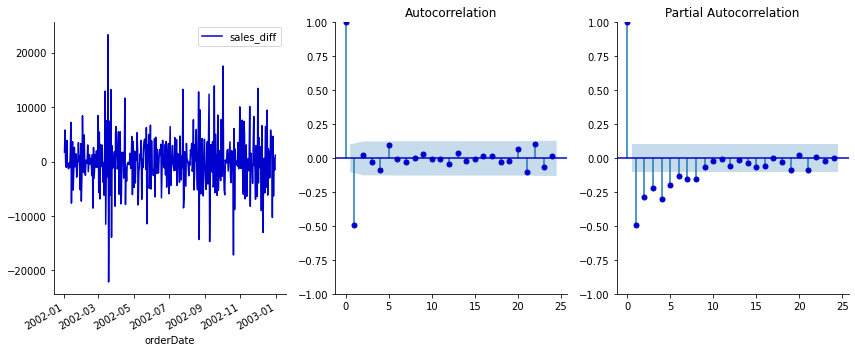

In [156]:
def plots(data, lags=None):
    
    dt_data = data.set_index('orderDate').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw = plt.subplot2grid(layout, (0, 0))
    acf = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()
    
plots(stationary, lags=24);